In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

ModuleNotFoundError: No module named 'numpy'

In [2]:
import os

# Section 2: Dataset Preparation
data_dir = r"C:\Users\Aryan khan\Videos\planets_moons_classification\Planets and Moons"  # Ensure this directory exists and contains subdirectories for each class

# Define planets and moons categories
categories = ['earth', 'jupiter', 'mars', 'mercury', 'moon', 'neptune', 'pluto', 'saturn', 'uranus', 'venus']

# Validate Dataset
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Dataset directory {data_dir} not found.")

# Check if all categories exist in the dataset directory
for category in categories:
    category_path = os.path.join(data_dir, category)
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        raise ValueError(f"Category '{category}' not found in the dataset directory.")

num_classes = len(categories)
print(f"Categories Found: {categories}")
print(f"Number of Classes: {num_classes}")


Categories Found: ['earth', 'jupiter', 'mars', 'mercury', 'moon', 'neptune', 'pluto', 'saturn', 'uranus', 'venus']
Number of Classes: 10


In [14]:
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

# Define the training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",  # Training data
    classes=categories
)

# Define the validation data generator
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",  # Validation data
    classes=categories
)

Found 1199 images belonging to 10 classes.
Found 290 images belonging to 10 classes.


In [15]:
# Section 4: Model Definition
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Ensure num_classes matches categories
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
epochs = 3
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Model evaluation
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_acc:.2f}")

# Save the model
model.save('planets_and_moons_model.h5')  # Save as 'planets_and_moons_model.h5'
print("Model saved as 'planets_and_moons_model.h5'")

c:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 185s 5s/step - accuracy: 0.4871 - loss: 2.8478 - val_accuracy: 0.9759 - val_loss: 0.1424
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.9862 - loss: 0.0830 - val_accuracy: 0.9931 - val_loss: 0.0520
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - accuracy: 1.0000 - loss: 0.0287 - val_accuracy: 0.9897 - val_loss: 0.0562
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9941 - loss: 0.0482


Validation Loss: 0.06, Validation Accuracy: 0.99
Model saved as 'planets_and_moons_model.h5'


Model loaded successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,044 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: moon


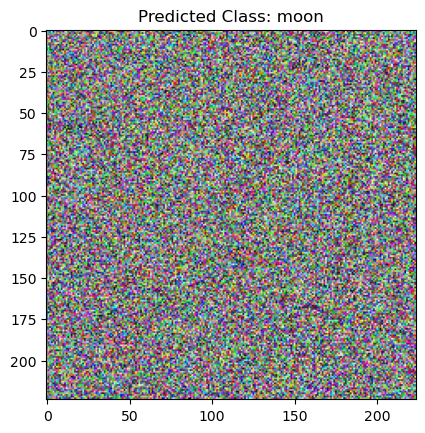

In [17]:
# Test the model
try:
    # Load the model in the new Keras format
    model = load_model('planets_and_moons_model.h5')
    print("Model loaded successfully.")
    model.summary()

    # Create a dummy input for testing
    example_input = np.random.random((1, 224, 224, 3)).astype(np.float32)

    # Make predictions
    prediction = model.predict(example_input)
    predicted_class = categories[np.argmax(prediction)]
    print(f"Predicted Class: {predicted_class}")

    # Display dummy image with prediction
    plt.imshow(example_input[0])
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

except Exception as e:
    print(f"Error during model testing: {e}")

In [18]:
# Section 7: Fine-tuning the Model (Optional)
train_data = np.random.random((100, 224, 224, 3))  # Replace with actual training data
train_labels = np.random.randint(0, num_classes, (100,))  # Replace with actual labels

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=5)
model.save('updated_planets_and_moons_model.h5')
print("Updated model saved as 'updated_planets_and_moons_model.h5'")

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0921 - loss: 4.3364
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.1565 - loss: 3.0060
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.1518 - loss: 2.9193
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1812 - loss: 2.3267
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2180 - loss: 2.3734


Updated model saved as 'updated_planets_and_moons_model.h5'
